In [101]:
import os
import pandas as pd
import numpy as np

In [164]:
pose_threshold = 6 # Euclidian distance for "no significant movement"
window_size = 24 # Frames for non-minimum suppression (24 per second), 
                # half of actual window size because both sides are checked
round_val = 45

In [149]:
# Function to calculate Euclidean distance between two points
def histogram_score(p1, p2, df):
    # Include only columns with absolute differences greater than 45
    included_columns = [col for col in df if abs(p1[col] - p2[col]) >= round_val]
    
    # Create modified points with non-included columns set to 0
    # modified_p1 = p1.copy()
    # modified_p2 = p2.copy()
    # for col in df.columns:
    #     if col not in included_columns:
    #         modified_p1[col] = 1
    #         modified_p2[col] = 1
    
    # Calculate the Euclidean distance using modified points
    # distance = np.linalg.norm(modified_p1.values[1:] - modified_p2.values[1:])
    # print(modified_p1)
    # print(modified_p2)
    return len(included_columns) + np.linalg.norm(p1[included_columns].values[1:] - 
                                                  p2[included_columns].values[1:]) / 100 + np.linalg.norm(
                                                      p1.values[1:] - p2.values[1:])  /100000

# Function to calculate Euclidean distances between consecutive rows
def calculate_distances(df, pose):
    distances = []
    for i in range(0, len(df)):
        distance = histogram_score(df.iloc[i], pose, df)
        distances.append(distance)
    return distances

histogram = []
histogram_null = []
def non_minimum_suppression(df, distances):
    outliers = []
    for i in range(0, len(distances)-1):
        if distances[i] < pose_threshold:
            min_in_window = min(distances[max(0, i-window_size):min(len(distances)-1, i+window_size+1)])

            if distances[i] <= min_in_window:
                # print(min_in_window, distances[i])
                outliers.append(i)
                histogram.append(distances[i])
            else:
                # print(min_in_window, distances[i])
                pass
    if outliers == []:
        histogram_null.append(min(distances[0:-1]))
    return outliers

In [104]:
filepath = "../data/2_angles/Chinese12.csv"
with open(filepath, 'r') as file:
    df = pd.read_csv(file)
print(histogram_score(df.iloc[650], df.iloc[1589], df))
print(df.iloc[[650, 1589]])
# print(df.iloc[1589])

4.78851576223224
      Unnamed: 0  Nose-Neck-RShoulder  Nose-Neck-LShoulder  \
650          650            83.528136           102.397596   
1589        1589            81.498194           104.078761   

      Neck-RShoulder-RElbow  Neck-LShoulder-LElbow  RShoulder-RElbow-RWrist  \
650              136.586865             170.490720               153.090331   
1589             137.768735             174.917929               161.357869   

      LShoulder-LElbow-LWrist  RHip-RShoulder-RElbow  LHip-LShoulder-LElbow  \
650                151.012446             143.663072              76.650170   
1589               165.395785             149.505786              73.662407   

      MidHip-RHip-RShoulder  MidHip-LHip-LShoulder  MidHip-RHip-RKnee  \
650               93.835486              98.394789          92.205483   
1589             103.810057              96.485943          99.910033   

      MidHip-LHip-LKnee  RHip-RKnee-RAnkle  LHip-LKnee-LAnkle  \
650           52.989476         152

In [150]:
def get_poses(filepath, pose, df=0):
    if not filepath == "df":
        with open(filepath, 'r') as file:
            df = pd.read_csv(file)
        # df = (df / round_val).round() * 10
    distances = calculate_distances(df, pose)
    # print(distances)
    outliers = non_minimum_suppression(df, distances)
    df_filtered = df.iloc[outliers]
    return outliers, df_filtered

In [165]:
in_dir = "../data/2_angles"
out_dir = "../data/5_similar_poses"
target = ['single_leg_balance_pro_dir.csv', [3, 86, 243, 437]]
# target = ['Chinese12.csv', [955, 1035, 1066, 1115, 1215, 1372, 1391, 1487, 1589, 1661, 1719, 1833]]
histogram = []
histogram_null = []

with open(os.path.join(in_dir, target[0]), 'r') as file:
    target_df = pd.read_csv(file)
# target_df = (target_df / round_val).round() * 10

print("[")
print(f"\t\"{target[0]}\",")
for target_frame in target[1]:
    print("\t[")
    print(f"\t\t{target_frame},")
    for filename in os.listdir(in_dir):
        if filename != target[0]:
            filepath = os.path.join(in_dir, filename)
            frames, poses = get_poses(filepath, target_df.iloc[target_frame])
        # else:
        #     frames, poses = get_poses("df", target_df.iloc[target_frame], target_df.iloc[:899])
            output_path = os.path.join(out_dir, filename)
            print(f"\t\t{[filename, frames]},")
    # poses.to_csv(output_path)
    print("\t],")
print("]")

print(histogram)
print(histogram_null)

[
	"single_leg_balance_pro_dir.csv",
	[
		3,
		['Chinese12.csv', [27]],
		['Chinese14.csv', [46]],
		['Chinese15.csv', [30]],
		['Chinese16.csv', []],
		['Chinese17.csv', []],
		['Chinese19.csv', []],
		['Chinese20.csv', []],
		['Indian1.csv', []],
		['Indian2.csv', [24]],
		['single_leg_balance_test2_dir.csv', [2, 37]],
	],
	[
		86,
		['Chinese12.csv', []],
		['Chinese14.csv', []],
		['Chinese15.csv', []],
		['Chinese16.csv', []],
		['Chinese17.csv', []],
		['Chinese19.csv', []],
		['Chinese20.csv', []],
		['Indian1.csv', []],
		['Indian2.csv', []],
		['single_leg_balance_test2_dir.csv', []],
	],
	[
		243,
		['Chinese12.csv', [222]],
		['Chinese14.csv', [215, 256, 287]],
		['Chinese15.csv', [252]],
		['Chinese16.csv', []],
		['Chinese17.csv', []],
		['Chinese19.csv', []],
		['Chinese20.csv', []],
		['Indian1.csv', []],
		['Indian2.csv', [242, 280]],
		['single_leg_balance_test2_dir.csv', [199, 287]],
	],
	[
		437,
		['Chinese12.csv', []],
		['Chinese14.csv', []],
		['Chinese15.csv', [

7.5, 24, 30
[
	"single_leg_balance_pro_dir.csv",
	[
		3,
		['Chinese12.csv', []],
		['Chinese14.csv', [21]],
		['Chinese15.csv', []],
		['Chinese16.csv', []],
		['Chinese17.csv', []],
		['Chinese19.csv', []],
		['Chinese20.csv', []],
		['Indian1.csv', []],
		['Indian2.csv', []],
	],
	[
		86,
		['Chinese12.csv', []],
		['Chinese14.csv', []],
		['Chinese15.csv', []],
		['Chinese16.csv', []],
		['Chinese17.csv', []],
		['Chinese19.csv', []],
		['Chinese20.csv', []],
		['Indian1.csv', []],
		['Indian2.csv', []],
	],
	[
		243,
		['Chinese12.csv', []],
		['Chinese14.csv', [219, 268]],
		['Chinese15.csv', [254]],
		['Chinese16.csv', []],
		['Chinese17.csv', []],
		['Chinese19.csv', []],
		['Chinese20.csv', []],
		['Indian1.csv', [1057]],
		['Indian2.csv', [270, 495]],
	],
	[
		437,
		['Chinese12.csv', []],
		['Chinese14.csv', []],
		['Chinese15.csv', []],
		['Chinese16.csv', []],
		['Chinese17.csv', [431]],
		['Chinese19.csv', []],
		['Chinese20.csv', []],
		['Indian1.csv', [1059]],
		['Indian2.csv', []],
	],
]
[5.773422618345988, 5.8815835321055685, 5.9637899037190145, 5.71725357923793, 7.405704217851194, 5.189290454340276, 7.122581595984391, 6.001085108547932, 7.422010930016791]
[11.34532996101498, 11.357342213631972, 15.437551489707728, 10.789324841081312, 12.711886309566632, 13.095044074283845, 7.682624824331303, 8.474038504484126, 10.920435537303137, 11.83604686455851, 12.023115099228013, 16.1972504617903, 11.487158017199336, 13.657738203443188, 14.216634212810211, 8.617319784457765, 8.17814920357956, 10.924511287072422, 14.020467674157993, 10.398610308525322, 12.521865005988731, 12.680283187368417, 11.012532836704361, 10.609256230814545, 10.910569086117372, 15.060336983345271, 12.595183312387894, 12.717361930702221, 8.135493263556427]


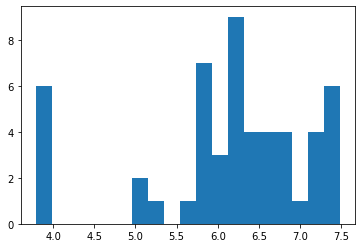

In [163]:
import matplotlib.pyplot as plt
plt.hist(histogram, bins=19)
plt.show()